In [25]:
import SignalGenerator as Sig
import SteeringGenerator as Stg
import DOAEstimators as Est
import matplotlib.pyplot as plt

In [26]:
# Generate steering vectors for signals arriving with DOA -45 and 60 degrees for an 8 element ULA array with
# separation of half a wavelength

A = Stg.generate_ula_vectors([-45, 60], 8, 1 / 2)

# Generate 4-QAM symbols for each source and with the desired number of snapshots

S = Sig.gen_signal(2, 100)

# Get noise free received symbol matrix X

X = A @ S

# Add some AWGN noise to X

Xn = Sig.add_noise(X, 10)

# Beamformer

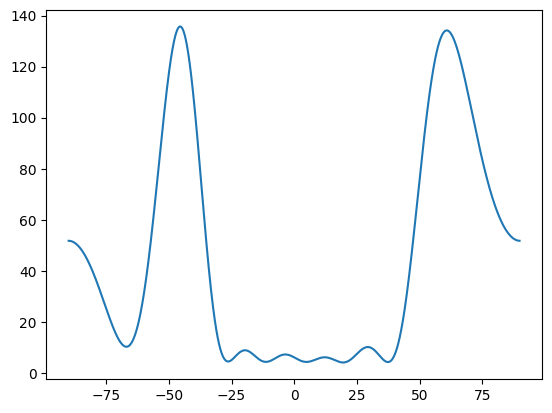

In [27]:
# The beamformer estimator takes in the received data matrix, the desired resolution, and the element separation of the array
power, angles = Est.conventional_beamformer(Xn, 0.1, 1 / 2)
plt.plot(angles, power)

# CAPON - MVDR

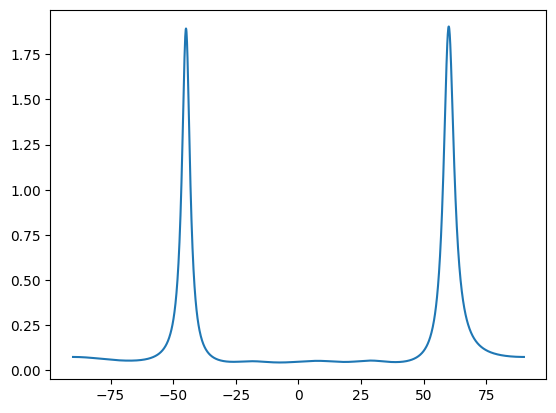

In [28]:
# Same signature as the conventional beamformer

power, angles = Est.CAPON_MVDR(Xn, 0.1, 1/2)

plt.plot(angles, power)

# MUSIC

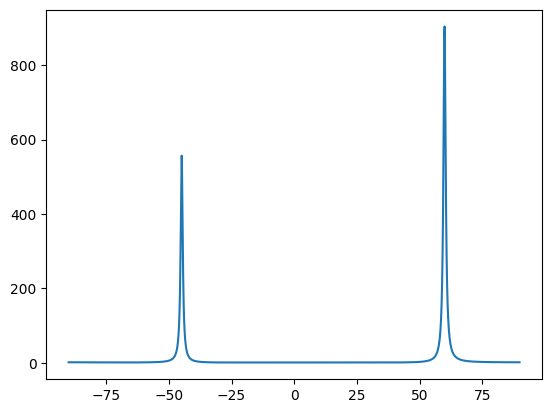

In [29]:
# The MUSIC estimator takes in the received signal, number of signals, resolution, and array separation

power, angles = Est.MUSIC(Xn, 2, 0.1, 1/2)

plt.plot(angles, power)

# Min-Norm

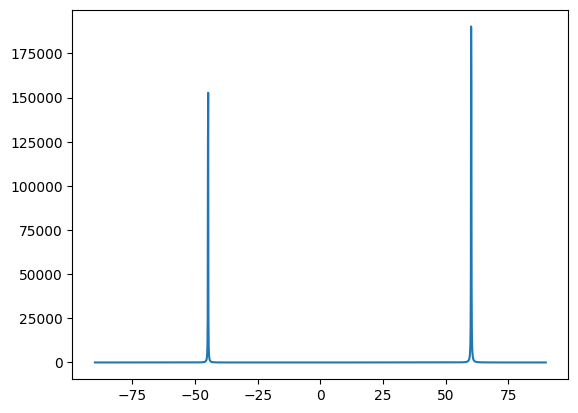

In [30]:
# The Min-Norm has the same signature as the MUSIC estimator

power, angles = Est.Min_Norm(Xn, 2, 0.1, 1/2)

plt.plot(angles, power)


# ESPRIT

In [31]:
# The ESPRIT estimator takes in the received signal matrix, the number of signals (model order) and the array element separation

DOA_est = Est.ESPRIT(Xn, 2, 1 / 2)

DOA_est

array([-44.84289417,  60.04079753])

# SAGE

In [32]:
# The SAGE estimator takes in the received signal matrix, the model order, the desired resolution, and the array element separation

DOA_est = Est.SAGE(Xn, 2, 0.01, 1 / 2)

DOA_est

array([-44.99,  59.96])